# EDA

Let's begin by importing the necessary libraries and loading the dataset. Since our dataset is massive, and has grown by almost a third in just the last 2 years, let's create a subset of the data to work with. Let's analyze the data from 2020 onwards for a more manageable dataset and to observe Covid-19's impact on the liquor sales. We start by filtering the data for dates from 2020 onwards and implementing an multi index structure to optimize performance for our product and time series analysis. This is a one time operation, since loading the original dataset is time consuming, so we will save the output as a parquet file and start our EDA on the parquet file.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import eda_utils as eda

##################################################################################################
#                                                                                                #
# #Commenting out one time operation                                                             #
#                                                                                                #
# # Load the dataset                                                                             #
# liquor_sales = pd.read_csv('Iowa_Liquor_Sales.csv', low_memory=False)                          #
#                                                                                                #
# # Convert Date and create filtered copy                                                        #
# liquor_sales['Date'] = pd.to_datetime(liquor_sales['Date'])                                    #
# filtered_df = liquor_sales[liquor_sales['Date'].dt.year >= 2020].copy()                        #
#                                                                                                #
# # Handle the Zip Code column specifically                                                      #
# filtered_df['Zip Code'] = filtered_df['Zip Code'].astype(str)                                  #
#                                                                                                #
# # Sort values first for better performance                                                     #
# filtered_df_sorted = filtered_df.sort_values(['Date', 'Item Number', 'Store Number'])          #
#                                                                                                #
# # Create multi-index structure optimized for product analysis                                  #
# filtered_df_indexed = filtered_df_sorted.set_index(['Date', 'Item Number', 'Store Number'])    #
#                                                                                                #
# # Export to parquet with optimized settings                                                    #
# output_filename = 'iowa_liquor_sales_2020_onwards.parquet'                                     #
# filtered_df_indexed.to_parquet(                                                                #
#     output_filename,                                                                           #
#     engine='pyarrow',                                                                          #
#     compression='snappy'                                                                       #
# )                                                                                              #
#                                                                                                #
##################################################################################################

Now that we have our lightweight Parquet formatted dataset, we can start to explore the data. 

In [2]:
liquor_sales = pd.read_parquet('data/iowa_liquor_sales_2020_onwards.parquet')

liquor_sales.head()


Invoice/Item Number  \
Date       Item Number Store Number                       
2020-01-02 10006       2611             INV-24307100006   
                       2684             INV-24299400032   
                       4234             INV-24310500037   
           10008       2500             INV-24290800008   
                       2556             INV-24299900002   

                                                                Store Name  \
Date       Item Number Store Number                                          
2020-01-02 10006       2611                     HY-VEE DRUGSTORE / OTTUMWA   
                       2684                           HY-VEE - FOREST CITY   
                       4234                  FAREWAY STORES #788 / SPENCER   
           10008       2500                    HY-VEE FOOD STORE #1 / AMES   
                       2556          HY-VEE WINE AND SPIRITS / ESTHERVILLE   

                                                     Address         City  \
Date       Item Number Store Number                                         
2020-01-02 10006       2611          1140 NORTH JEFFERSON ST      OTTUMWA   
                       2684                 315 HWY 69 NORTH  FOREST CITY   
                       4234                  104 E EIGHTH ST      SPENCER   
           10008       2500               3800 W LINCOLN WAY         AMES   
                       2556              1033 CENTRAL AVENUE  ESTHERVILLE   

                                    Zip Code  \
Date       Item Number Store Number            
2020-01-02 10006       2611            52501   
                       2684            50436   
                       4234            51301   
           10008       2500            50010   
                       2556            51334   

                                                            Store Location  \
Date       Item Number Store Number                                          
2020-01-02 10006       2611          POINT (-92.401538 41.026754000000004)   
                       2684                    POINT (-93.63235 43.266826)   
                       4234                   POINT (-95.143388 43.145797)   
           10008       2500                                           None   
                       2556                   POINT (-94.829962 43.402096)   

                                     County Number     County   Category  \
Date       Item Number Store Number                                        
2020-01-02 10006       2611                   90.0    WAPELLO  1012200.0   
                       2684                   95.0  WINNEBAGO  1012200.0   
                       4234                   21.0       CLAY  1012200.0   
           10008       2500                   85.0      STORY  1012200.0   
                       2556                   32.0      EMMET  1012200.0   

                                       Category Name  ...  \
Date       Item Number Store Number                   ...   
2020-01-02 10006       2611          SCOTCH WHISKIES  ...   
                       2684          SCOTCH WHISKIES  ...   
                       4234          SCOTCH WHISKIES  ...   
           10008       2500          SCOTCH WHISKIES  ...   
                       2556          SCOTCH WHISKIES  ...   

                                              Vendor Name  \
Date       Item Number Store Number                         
2020-01-02 10006       2611          SAZERAC COMPANY  INC   
                       2684          SAZERAC COMPANY  INC   
                       4234          SAZERAC COMPANY  INC   
           10008       2500          SAZERAC COMPANY  INC   
                       2556          SAZERAC COMPANY  INC   

                                         Item Description Pack  \
Date       Item Number Store Number                              
2020-01-02 10006       2611          SCORESBY RARE SCOTCH   12   
                       2684          SCORESBY RARE SCOTCH   12  

In [3]:
liquor_sales.shape

(13032174, 21)

In [4]:
liquor_sales.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13032174 entries, (Timestamp('2020-01-02 00:00:00'), '10006', 2611) to (Timestamp('2024-12-31 00:00:00'), '994876', 10003)
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Store Name             object 
 2   Address                object 
 3   City                   object 
 4   Zip Code               object 
 5   Store Location         object 
 6   County Number          float64
 7   County                 object 
 8   Category               float64
 9   Category Name          object 
 10  Vendor Number          float64
 11  Vendor Name            object 
 12  Item Description       object 
 13  Pack                   int64  
 14  Bottle Volume (ml)     int64  
 15  State Bottle Cost      float64
 16  State Bottle Retail    float64
 17  Bottles Sold           int64  
 18  Sale (Dollars)         float64
 19  Volume Sold (Liters)   float64
 2

Let's see how many cities are in the dataset, along with the cities that have the most transactions.

In [5]:
print(liquor_sales['City'].nunique())
liquor_sales['City'].value_counts()


478


City
DES MOINES         1058900
CEDAR RAPIDS        839345
DAVENPORT           526598
WEST DES MOINES     428525
WATERLOO            383047
                    ...   
WAYLAND                 50
BADGER                  49
IRWIN                   49
MANILLA                 35
DUNCOMBE                 6
Name: count, Length: 478, dtype: int64

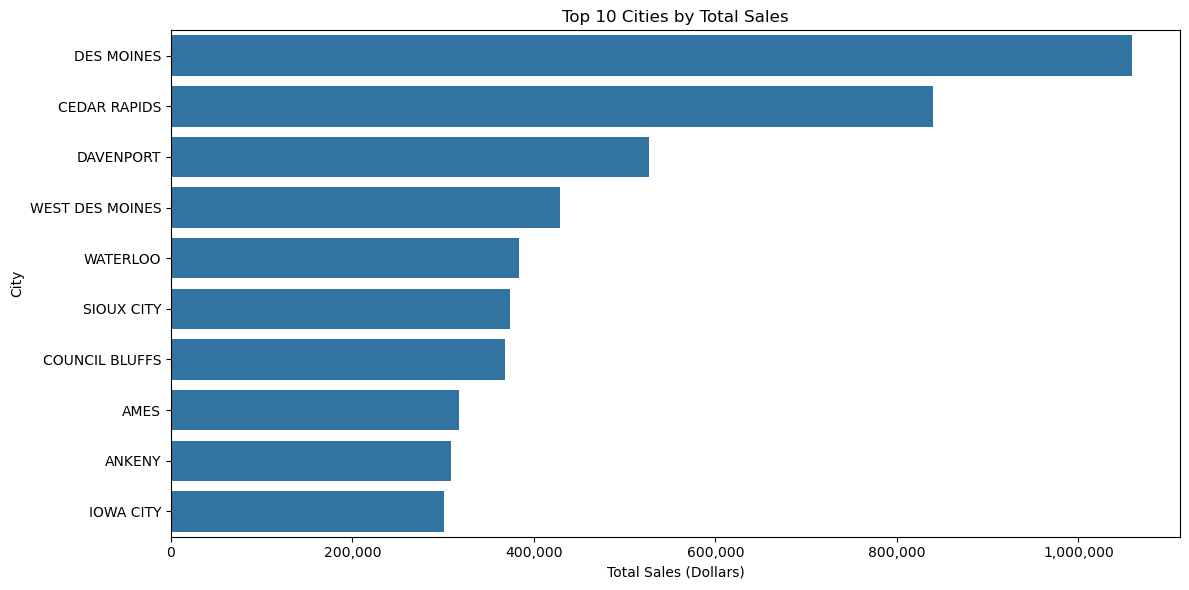

In [6]:
eda.bar_plot_top_n(
    data=liquor_sales,
    group_by_col='City',
    value_col='Sale (Dollars)',
    title='Top 10 Cities by Total Sales',
    xlabel='Total Sales (Dollars)',
    agg_func='count'
)

Seems like Des Moines has the most transactions, so let's see how many liquor stores are in Des Moines.




In [7]:
print(liquor_sales.reset_index().query("City == 'DES MOINES'")['Store Number'].nunique())


100


Does this mean that Des Moines has the most liquor stores in Iowa? Let's find out.


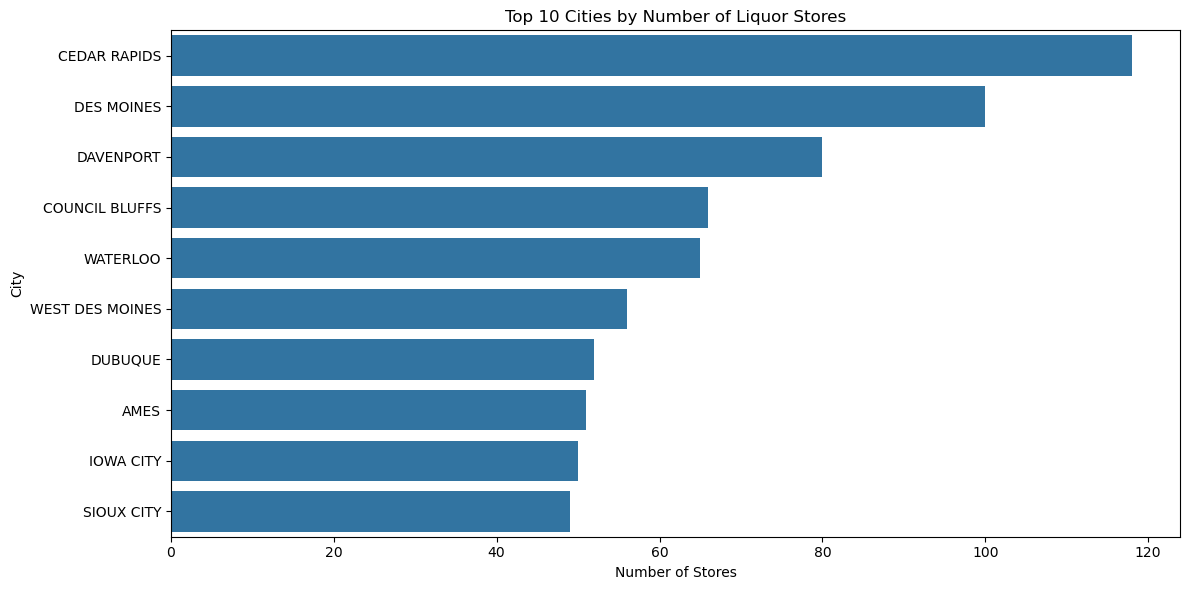

In [8]:

eda.bar_plot_top_n(
    data=liquor_sales,
    group_by_col='City',
    value_col='Store Number',
    title='Top 10 Cities by Number of Liquor Stores',
    xlabel='Number of Stores',
    agg_func='nunique'
)

Interesting, even though Cedar Rapids has more stores then Des Moines, they are still outsold by almost 20%. By comparing the 2 bargraphs, we can see that more sales does not always equal more stores in the city. If Des Moines is the highest selling city without having the most stores, it means they have a high demand and is a fantastic candidate for a city to add more liquor stores to.

Before we start a deep dive into product analysis, let's clean up our dataset and handle missing values


## Cleaning the Dataset

### Let's deal with any missing values

We'll start by getting a list of all columns with missing values

In [9]:
# Calculate missing values
total = liquor_sales.isnull().sum()
percent = (liquor_sales.isnull().sum()/len(liquor_sales)) * 100  


missing_data = pd.DataFrame({
    'Total': total,
    'Percent': percent
})

# Filter and sort
missing_data = missing_data[missing_data['Total'] > 0].sort_values('Percent', ascending=False)
print(missing_data)


                  Total    Percent
County Number   6477908  49.707040
Store Location   787088   6.039576
Address            3720   0.028545
City               3720   0.028545
County             3720   0.028545
Category            682   0.005233
Category Name       682   0.005233
Vendor Number         4   0.000031
Vendor Name           4   0.000031


Seems like we have 9 columns with missing values. Let's start from the top and go down.

"County Number" is missing almost 50% of its values. According to the Dataset description, County Number is the Iowa county number for the county where the store that ordered the liquor is located. Since our County column is only missing .03% of its values, we can go through and map our available Countys to their County Number, in order to impute missing County Number Values.


In [10]:

liquor_sales_clean = liquor_sales.copy()

missing_before = liquor_sales_clean['County Number'].isna().sum()
#Create initial county mapping from valid entries
valid_mapping = liquor_sales[['County', 'County Number']].dropna().drop_duplicates()
county_number_map = valid_mapping.groupby('County')['County Number'].first().to_dict()

# Fill missing County Numbers where we have a County name
liquor_sales_clean['County Number'] = liquor_sales_clean.apply(lambda x: county_number_map.get(x['County']) 
                             if pd.isna(x['County Number']) and pd.notna(x['County']) 
                             else x['County Number'], axis=1)

# Get counts after filling
missing_after = liquor_sales_clean['County Number'].isna().sum()

print("After filling:")
print("Missing County Numbers:", missing_after)
print("Number of values filled:", missing_before - missing_after)

After filling:
Missing County Numbers: 3720
Number of values filled: 6474188


Our imputation was very successful, and we can see that the remaining missing values exactly match the number of missing County names, meaning these entries are missing both values for County Info. Let's analyze the City information to see if we can use complete records to map cities to their counties, allowing us to also impute the missing values for County name.

In [11]:
missing_before = liquor_sales_clean['County Number'].isna().sum()


#Create city-to-county mapping from known good data
city_county_dict = (liquor_sales_clean[['City', 'County', 'County Number']]
                   .dropna()
                   .drop_duplicates()
                   .groupby('City')
                   .agg({
                       'County': 'first',
                       'County Number': 'first'
                   })
                   .to_dict('index'))

# Get missing records and extract cities
missing_records = liquor_sales_clean[liquor_sales_clean['County'].isna()].copy()
missing_records['Extracted_City'] = missing_records['Store Name'].apply(eda.extract_city_from_store)

# Create and apply store-based county fixes
store_fixes = {
    row['Store Name']: city_county_dict[row['Extracted_City']]
    for _, row in missing_records.iterrows()
    if row['Extracted_City'] in city_county_dict
}

# Apply fixes based on city extraction
for store_name, county_info in store_fixes.items():
    mask = (liquor_sales_clean['Store Name'] == store_name) & (liquor_sales_clean['County'].isna())
    liquor_sales_clean.loc[mask, ['County', 'County Number']] = [
        county_info['County'], 
        county_info['County Number']
    ]

missing_after = liquor_sales_clean['County Number'].isna().sum()

print("After filling:")
print("Missing County Numbers:", missing_after)
print("Number of values filled:", missing_before - missing_after)

After filling:
Missing County Numbers: 460
Number of values filled: 3260


Seems like we have 460 missing values left. Let's take a peek at them to see what other values they are missing and identify another potential mapping we can use to find it's county number.

In [12]:
print(liquor_sales_clean[liquor_sales_clean['County'].isna()].head())


                                    Invoice/Item Number Store Name Address  \
Date       Item Number Store Number                                          
2020-03-03 10550       3808             INV-25585100044  THRIFTWAY    None   
           10627       3808             INV-25585100014  THRIFTWAY    None   
           10808       3808             INV-25585100039  THRIFTWAY    None   
           11296       3808             INV-25585100023  THRIFTWAY    None   
           11297       3808             INV-25585100038  THRIFTWAY    None   

                                     City Zip Code Store Location  \
Date       Item Number Store Number                                 
2020-03-03 10550       3808          None      nan           None   
           10627       3808          None      nan           None   
           10808       3808          None      nan           None   
           11296       3808          None      nan           None   
           11297       3808          No

It looks like these records are missing all location info in general. The only unique identifier I can see here are the Store Names and Numbers. These transactions were all made at a THRIFTWAY store, so let's see if we can find other transactions records from the same store that might have County info present. This would allow us to implement a Store Name/Number to County info mapping and impute the remaining missing values.

In [13]:
# Find THRIFTWAY records with county info
print("THRIFTWAY records WITH county information:")
print(liquor_sales_clean[
    (liquor_sales_clean['Store Name'].str.contains('THRIFTWAY', na=False)) & 
    (liquor_sales_clean['County'].notna())
][['Store Name', 'City', 'County', 'County Number']].drop_duplicates())

print("\nTHRIFTWAY records WITHOUT county information:")
print(liquor_sales_clean[
    (liquor_sales_clean['Store Name'].str.contains('THRIFTWAY', na=False)) & 
    (liquor_sales_clean['County'].isna())
][['Store Name', 'City', 'County', 'County Number']].drop_duplicates())

# Get total count of each case
with_county = len(liquor_sales_clean[
    (liquor_sales_clean['Store Name'].str.contains('THRIFTWAY', na=False)) & 
    (liquor_sales_clean['County'].notna())
])

without_county = len(liquor_sales_clean[
    (liquor_sales_clean['Store Name'].str.contains('THRIFTWAY', na=False)) & 
    (liquor_sales_clean['County'].isna())
])

print(f"\nTotal THRIFTWAY records with county: {with_county}")
print(f"Total THRIFTWAY records without county: {without_county}")

THRIFTWAY records WITH county information:
                                                    Store Name           City  \
Date       Item Number Store Number                                             
2020-01-07 10550       3808                          THRIFTWAY  LA PORTE CITY   
2020-03-31 10550       5931          THRIFTWAY / LA PORTE CITY  LA PORTE CITY   

                                         County  County Number  
Date       Item Number Store Number                             
2020-01-07 10550       3808          BLACK HAWK            7.0  
2020-03-31 10550       5931          BLACK HAWK            7.0  

THRIFTWAY records WITHOUT county information:
                                    Store Name  City County  County Number
Date       Item Number Store Number                                       
2020-03-03 10550       3808          THRIFTWAY  None   None            NaN

Total THRIFTWAY records with county: 2816
Total THRIFTWAY records without county: 69


Nice! We can see that our missing THRIFTWAY record matches with the ones that have County Info present. Let's implement a Store Name mapping to County info and match them with our Store Names that are missing County Info. 


In [14]:
missing_before = liquor_sales_clean['County Number'].isna().sum()

# Get complete store information
complete_stores = liquor_sales_clean[liquor_sales_clean['County'].notna()][
    ['Store Name', 'City', 'County', 'County Number']
].drop_duplicates()

# Create mapping using cleaned store names
store_mapping = {}
for _, row in complete_stores.iterrows():
    clean_name = row['Store Name'].split('/')[0].strip()
    if clean_name not in store_mapping:
        store_mapping[clean_name] = {
            'County': row['County'],
            'County Number': row['County Number']
        }

# Apply fixes based on store name matching
missing_mask = liquor_sales_clean['County'].isna()
for idx, row in liquor_sales_clean[missing_mask].iterrows():
    clean_name = row['Store Name'].split('/')[0].strip()
    if clean_name in store_mapping:
        liquor_sales_clean.loc[
            idx,
            ['County', 'County Number']
        ] = [
            store_mapping[clean_name]['County'],
            store_mapping[clean_name]['County Number']
        ]
missing_after = liquor_sales_clean['County Number'].isna().sum()
print("Before Filling", missing_before)
print("After filling:")
print("Missing County Numbers:", missing_after)
print("Number of values filled:", missing_before - missing_after)

Before Filling 460
After filling:
Missing County Numbers: 0
Number of values filled: 460


Wonderful, we were able to impute all missing values for County and County Number. Let's see what's next.

In [15]:
total = liquor_sales_clean.isnull().sum()
percent = (liquor_sales_clean.isnull().sum()/len(liquor_sales_clean)) * 100  


missing_data = pd.DataFrame({
    'Total': total,
    'Percent': percent
})

# Filter and sort
missing_data = missing_data[missing_data['Total'] > 0].sort_values('Percent', ascending=False)
print(missing_data)

                 Total   Percent
Store Location  787088  6.039576
Address           3720  0.028545
City              3720  0.028545
Category           682  0.005233
Category Name      682  0.005233
Vendor Number        4  0.000031
Vendor Name          4  0.000031


Store Location is the next biggest culprit, missing around 6% of its values. Since this columns is not really relevant to our analysis, we can safely drop the column.

In [16]:
liquor_sales_clean = liquor_sales_clean.drop('Store Location', axis=1)

total = liquor_sales_clean.isnull().sum()
percent = (liquor_sales_clean.isnull().sum()/len(liquor_sales_clean)) * 100  


missing_data = pd.DataFrame({
    'Total': total,
    'Percent': percent
})

# Filter and sort
missing_data = missing_data[missing_data['Total'] > 0].sort_values('Percent', ascending=False)
print(missing_data)

               Total   Percent
Address         3720  0.028545
City            3720  0.028545
Category         682  0.005233
Category Name    682  0.005233
Vendor Number      4  0.000031
Vendor Name        4  0.000031


For the sake of focus, let's skip Address and City and look at Category and Categry Name. We can see that they have the exact same number of missing values...interesting....
Let's check if they are actually the same 682 records.

In [17]:
missing_match = (liquor_sales_clean['Category'].isna() == liquor_sales_clean['Category Name'].isna()).all()
print(missing_match)

True


This is great news for us, we can take out 2 birds with 1 stone again. Now let's take a look at these records with missing Category values.

In [18]:
missing_cat = liquor_sales_clean[liquor_sales_clean['Category'].isna()][['Item Description', 'Category', 'Category Name']].head()
print(missing_cat)

                                                    Item Description  \
Date       Item Number Store Number                                    
2020-01-02 36122       2670                          DEEP EDDY 80PRF   
                       3625                          DEEP EDDY 80PRF   
           80024       2233          BLUE CHAIR BAY BANANA RUM CREAM   
                       2543          BLUE CHAIR BAY BANANA RUM CREAM   
                       2590          BLUE CHAIR BAY BANANA RUM CREAM   

                                     Category Category Name  
Date       Item Number Store Number                          
2020-01-02 36122       2670               NaN          None  
                       3625               NaN          None  
           80024       2233               NaN          None  
                       2543               NaN          None  
                       2590               NaN          None  


Ok, we can see some Item Descriptions for these transactions. Let's see if we can find other transactions of the same Item Description that has Category Info present.

In [19]:
sample_items = liquor_sales_clean[liquor_sales_clean['Category'].isna()]['Item Description'].unique()[:3]
print("\
Checking if these items appear elsewhere with category information:")
for item in sample_items:
    print(f"\
Item: {item}")
    found_categories = liquor_sales_clean[
        (liquor_sales_clean['Item Description'] == item) & 
        liquor_sales_clean['Category'].notna()
    ][['Category', 'Category Name']].drop_duplicates()
    print(found_categories)

Checking if these items appear elsewhere with category information:
Item: DEEP EDDY 80PRF
                                      Category    Category Name
Date       Item Number Store Number                            
2020-01-03 36124       2548          1031100.0  AMERICAN VODKAS
Item: BLUE CHAIR BAY BANANA RUM CREAM
                                      Category Category Name
Date       Item Number Store Number                         
2020-06-01 80024       2539          1062500.0  FLAVORED RUM
Item: 99 PINEAPPLE MINI
                                      Category                 Category Name
Date       Item Number Store Number                                         
2020-02-03 84197       2614          1081300.0  AMERICAN CORDIALS & LIQUEURS


Noice! We can now implement an Item Description to Category Info mapping to impute the missing values for Category and Category Name.

In [20]:
# Create a mapping dictionary from items with valid categories
category_mapping = liquor_sales_clean[liquor_sales_clean['Category'].notna()].groupby('Item Description').agg({
    'Category': 'first',
    'Category Name': 'first'
}).to_dict('index')

# Create a copy of the dataframe to avoid modifying the original
liquor_sales_clean_test = liquor_sales_clean.copy()

# Count missing before imputation
missing_before = liquor_sales_clean_test['Category'].isna().sum()

# Impute categories based on exact Item Description matches
mask = liquor_sales_clean_test['Category'].isna()
liquor_sales_clean_test.loc[mask, 'Category'] = liquor_sales_clean_test.loc[mask, 'Item Description'].map(
    lambda x: category_mapping[x]['Category'] if x in category_mapping else None)
liquor_sales_clean_test.loc[mask, 'Category Name'] = liquor_sales_clean_test.loc[mask, 'Item Description'].map(
    lambda x: category_mapping[x]['Category Name'] if x in category_mapping else None)

# Count missing after imputation
missing_after = liquor_sales_clean_test['Category'].isna().sum()

print(f"Missing values before imputation: {missing_before}")
print(f"Missing values after imputation: {missing_after}")
print(f"Number of values imputed: {missing_before - missing_after}")

# Show remaining items with missing categories


Missing values before imputation: 682
Missing values after imputation: 21
Number of values imputed: 661
Remaining items with missing categories:
- BASTILLE 1789
- SOOH DIPLOMATICO RESERVA EXCLUSIVA
- BAINS CAPE MOUNTAIN WHISKEY
- REVEL STOKE SPICED
- SKYY INFUSIONS BLOOD ORANGE
- DON AMADO MEZCAL RUSTICO
- DEKUYPER MIXOLOGIST GINGER
- SAUZA CIEN ANOS BLANCO
- CEDAR RIDGE RESERVE BOURBON
Analysis of remaining missing items:
Unique vendors with missing categories:
['PALM BAY INTERNATIONAL' 'E & J GALLO WINERY'
 'PATERNO IMPORTS LTD / TERLATO WINES INTERNATIONAL' 'PHILLIPS BEVERAGE'
 'CAMPARI AMERICA' 'HAAS BROTHERS' 'JIM BEAM BRANDS'
 'CEDAR RIDGE VINEYARDS LL']


That was able to fill in most of the missing values. Let's see what we're left with.

In [34]:
remaining_df = liquor_sales_clean_test[
    (liquor_sales_clean_test['Category'].isna()) & 
    (liquor_sales_clean_test['Item Description'].isin(liquor_sales_clean_test[liquor_sales_clean_test['Category'].isna()]['Item Description'].unique()))
][['Item Description', 'Vendor Name', 'State Bottle Retail']].drop_duplicates()

# print("Detailed view of remaining items:")
# print(remaining_df)
# print("\nRemaining items with missing categories:")
# display(remaining_df)

# Print total number of missing categories after imputation
print("\nRecords with missing categories:")
display(liquor_sales_clean_test[liquor_sales_clean_test['Category'].isna()][['Item Description', 'Category', 'Category Name']].drop_duplicates())
print(f"\nTotal missing categories: {liquor_sales_clean_test['Category'].isna().sum()}")





Records with missing categories:


,,,Item Description,Category,Category Name
Date,Item Number,Store Number,,,
2020-01-03,915951,3869,BASTILLE 1789,NaN,None
2020-01-13,994771,2190,SOOH DIPLOMATICO RESERVA EXCLUSIVA,NaN,None
2020-02-06,995509,4129,BAINS CAPE MOUNTAIN WHISKEY,NaN,None
2020-02-10,977256,5102,REVEL STOKE SPICED,NaN,None
2020-02-24,940831,2633,SKYY INFUSIONS BLOOD ORANGE,NaN,None
2020-02-27,997877,3869,DON AMADO MEZCAL RUSTICO,NaN,None
2020-04-16,973508,2515,DEKUYPER MIXOLOGIST GINGER,NaN,None
2020-04-17,902152,4057,SAUZA CIEN ANOS BLANCO,NaN,None
2020-05-11,27849,2662,CEDAR RIDGE RESERVE BOURBON,NaN,None



Total missing categories: 21


## Product Analysis

### Let's find the most popular product categories and brands

Let's see how many categories are in the dataset, along with the categories that have the most transactions.

In [21]:
print(liquor_sales['Category Name'].nunique())
liquor_sales['Category Name'].value_counts()

50


Category Name
AMERICAN VODKAS                         1978448
CANADIAN WHISKIES                       1224386
STRAIGHT BOURBON WHISKIES                964827
WHISKEY LIQUEUR                          770717
AMERICAN FLAVORED VODKA                  614266
100% AGAVE TEQUILA                       543098
SPICED RUM                               532598
BLENDED WHISKIES                         505739
AMERICAN SCHNAPPS                        422633
COCKTAILS/RTD                            415606
TENNESSEE WHISKIES                       374432
IMPORTED VODKAS                          336146
AMERICAN BRANDIES                        317770
AMERICAN CORDIALS & LIQUEURS             317241
TEMPORARY & SPECIALTY PACKAGES           306080
IMPORTED CORDIALS & LIQUEURS             295109
FLAVORED RUM                             284159
MIXTO TEQUILA                            282539
CREAM LIQUEURS                           258275
WHITE RUM                                246754
IMPORTED BRANDIES         

50 Categories is a lot. It seems a lot of the categories can be grouped based on the "type" of alcohol it is. For example, we have different categories for differnt types of Vodkas and Rums. Let's use those broad categories to design and implement a coarse-grained category system.             

In [22]:
coarse_category_mapping = {
    'WHISKIES': ['SCOTCH WHISKIES', 'CANADIAN WHISKIES', 'STRAIGHT RYE WHISKIES', 'IRISH WHISKIES',
                 'BLENDED WHISKIES', 'BOTTLED IN BOND BOURBON', 'STRAIGHT BOURBON WHISKIES',
                 'SINGLE BARREL BOURBON WHISKIES', 'TENNESSEE WHISKIES', 'CORN WHISKIES',
                 'SINGLE MALT SCOTCH', 'IMPORTED WHISKIES', 'AMERICAN WHISKIES', 'IOWA DISTILLERY WHISKIES',
                 'WHISKEY LIQUEUR'],  
    'RUM': ['SPICED RUM', 'AGED DARK RUM', 'FLAVORED RUM', 'WHITE RUM', 'GOLD RUM'],
    'VODKA': ['IMPORTED VODKAS', 'AMERICAN VODKAS', 'IMPORTED FLAVORED VODKA', 'AMERICAN FLAVORED VODKA'],
    'GIN': ['IMPORTED DRY GINS', 'AMERICAN DRY GINS', 'FLAVORED GIN', 'IMPORTED GINS', 'AMERICAN SLOE GINS'],
    'TEQUILA/MEZCAL': ['100% AGAVE TEQUILA', 'MIXTO TEQUILA', 'MEZCAL'],
    'LIQUEURS': ['CREAM LIQUEURS', 'COFFEE LIQUEURS', 'AMERICAN CORDIALS & LIQUEURS', 
                 'IMPORTED CORDIALS & LIQUEURS', 'TRIPLE SEC'],
    'BRANDIES': ['IMPORTED BRANDIES', 'AMERICAN BRANDIES'],  
    'SCHNAPPS': ['AMERICAN SCHNAPPS', 'IMPORTED SCHNAPPS'],
    'COCKTAILS/RTD': ['COCKTAILS/RTD'],
    'DISTILLED SPIRITS': ['AMERICAN DISTILLED SPIRITS SPECIALTY', 'IMPORTED DISTILLED SPIRITS SPECIALTY',
                         'DISTILLED SPIRITS SPECIALTY', 'NEUTRAL GRAIN SPIRITS',
                         'NEUTRAL GRAIN SPIRITS FLAVORED'],
    'OTHER': ['TEMPORARY & SPECIALTY PACKAGES', 'SPECIAL ORDER ITEMS', 'DELISTED / SPECIAL ORDER ITEMS']
}

liquor_sales['Coarse_Category'] = liquor_sales['Category Name'].apply(
    lambda x: eda.map_to_coarse_category(x, coarse_category_mapping)
)

print(liquor_sales['Coarse_Category'].nunique())
liquor_sales['Coarse_Category'].value_counts()




12


Coarse_Category
WHISKIES             4448959
VODKA                3117479
RUM                  1165400
LIQUEURS              976958
TEQUILA/MEZCAL        838841
SCHNAPPS              608210
BRANDIES              551493
COCKTAILS/RTD         415606
GIN                   339248
OTHER                 323997
DISTILLED SPIRITS     245301
UNKNOWN                  682
Name: count, dtype: int64

In [23]:
# Check for missing values in Category Name column
print("Number of missing values in Category Name:", liquor_sales['Category Name'].isna().sum())
print("\nPercentage of missing values:", (liquor_sales['Category Name'].isna().sum() / len(liquor_sales)) * 100, "%")


Number of missing values in Category Name: 682

Percentage of missing values: 0.0052332020735757516 %
